# Loading the Data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Magic number: Identifies the file type.
## Number of images: Total number of images in the file.
## Rows and Columns: Dimensions of each image (28x28 for Fashion-MNIST).
## Image data: Pixel values (grayscale values from 0 to 255).


In [2]:
def load_data(file_path):

    with open(file_path,'rb') as f:
        # Read the magic number and dimensions

        magic, num_images, rows, cols = np.frombuffer(f.read(16), dtype=np.uint32).byteswap()

        # Read the image data
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)

    return data


train_images = load_data(r"/kaggle/input/fashion-images/train-images-idx3-ubyte")
test_images  = load_data(r"/kaggle/input/fashion-images/t10k-images-idx3-ubyte")

print(f"Loaded {train_images.shape[0]} images of size {train_images.shape[1]}x{train_images.shape[2]}")

print(f"Loaded Testing : {test_images.shape[0]} images of size {test_images.shape[1]}x{test_images.shape[2]}")

Loaded 60000 images of size 28x28
Loaded Testing : 10000 images of size 28x28


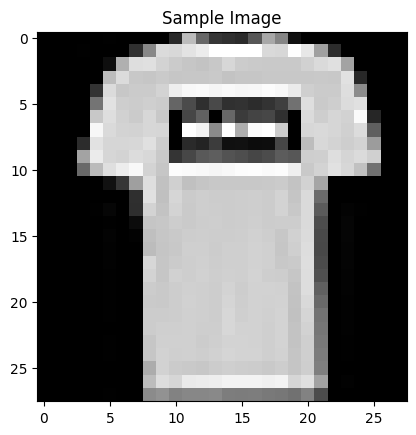

In [3]:
# Display the 2nd image
plt.imshow(train_images[1], cmap='gray')
plt.title("Sample Image")
plt.show()


### loading the Training labels

In [4]:
def load_idx_labels(filename):
    """Loads the IDX label file."""
    with open(filename, 'rb') as f:
        _, num_labels = np.frombuffer(f.read(8), dtype=np.uint32).byteswap()
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_labels = load_idx_labels(r"/kaggle/input/fashion-images/train-labels-idx1-ubyte")
test_labels  = load_idx_labels(r"/kaggle/input/fashion-images/t10k-labels-idx1-ubyte")

print("Loaded Training labels of a shape : " + str(train_labels.shape[0]))
print("Loaded Test labels of a shape : " + str(test_labels.shape[0]))

Loaded Training labels of a shape : 60000
Loaded Test labels of a shape : 10000


In [5]:
# Flatten the images
num_samples, height, width = train_images.shape
train_images_reshaped = train_images.reshape(num_samples, height * width)

# Create a DataFrame
df = pd.DataFrame(train_images_reshaped)

In [6]:
df['labels'] = train_labels

### Here's a breakdown for the encoding of the labels: 
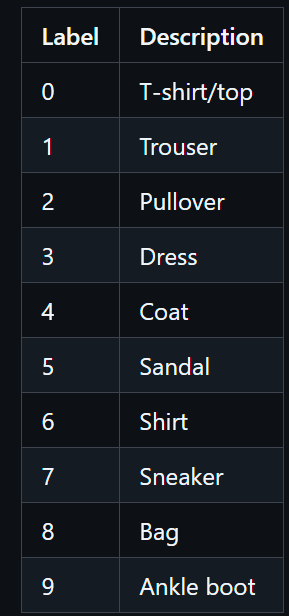

In [7]:
labels = {
          1:'Trouser',
          3:'Dress',
          5:'Sandal',
          6:'Shirt',
          7:'Sneaker',
          8:'Bag',
          9:'Ankle boot'}

In [8]:
df.shape

(60000, 785)

In [9]:
df = df[(df['labels'] != 0) & (df['labels'] != 4) & (df['labels'] != 2)]

In [10]:
df.shape

(42000, 785)

In [11]:
df['labels'].value_counts()


labels
9    6000
3    6000
7    6000
5    6000
1    6000
6    6000
8    6000
Name: count, dtype: int64

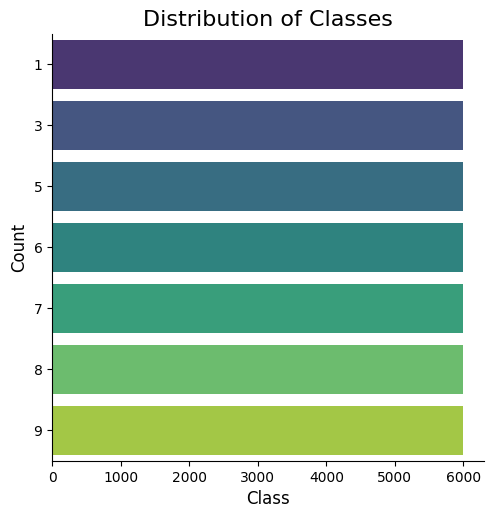

In [12]:
sns.catplot(data=df , y='labels',palette='viridis' , kind='count')
plt.title('Distribution of Classes', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


<h2>as we can see all the classes are balanced which is perfect !</h2>

# Pre-Processing

In [ ]:
# I'm going to normalize the pixels

df.iloc[:, :-1] = df.iloc[:, :-1] / 255.0

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['labels'] , axis = 1)
y = df['labels']

X_train1 , X_test , y_train1 , y_test = train_test_split(X,y , test_size=0.35,random_state=42 , shuffle=True)
X_train2 , X_valid , y_train2 , y_valid = train_test_split(X_train1,y_train1 , test_size=0.15,random_state=42 , shuffle=True)


In [15]:
X_train2.shape , y_train2.shape , X_valid.shape , y_valid.shape , X_test.shape , X_test.shape

((23205, 784), (23205,), (4095, 784), (4095,), (14700, 784), (14700, 784))

# Modeling

In [25]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# knn_param_grid = {
#     'n_neighbors': [3, 5,7],
#     'weights': ['uniform'],  # Keep one weighting scheme
#     'metric': ['euclidean']  # Use a single distance metric
# }


# # Initialize KNN classifier
# knn = KNeighborsClassifier()

# # Initialize GridSearchCV
# knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search
# print("Tuning KNN...")
# knn_grid_search.fit(X_train2, y_train2)


# # Print best parameters and score
# print("\nBest parameters for KNN:", knn_grid_search.best_params_)
# print("Best cross-validation accuracy for KNN:", knn_grid_search.best_score_)

# # Test set evaluation
# knn_test_score = knn_grid_search.score(X_test, y_test)
# print("Test accuracy for KNN:", knn_test_score)


In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Define the Logistic Regression parameter grid
# logreg_param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l2'],             # Regularization type
#     'solver': ['lbfgs', 'saga']    # Solvers
# }

# Initialize Logistic Regression
# logreg = LogisticRegression(max_iter=10000 , penalty='l2' , C=0.1)

# # Initialize GridSearchCV
# logreg_grid_search = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search
# print("Tuning Logistic Regression...")
# logreg_grid_search.fit(X_train2, y_train2)

# # Print best parameters and score
# print("\nBest parameters for Logistic Regression:", logreg_grid_search.best_params_)
# print("Best cross-validation accuracy for Logistic Regression:", logreg_grid_search.best_score_)

# # Get the best model from the grid search
# best_logreg_model = logreg_grid_search.best_estimator_

# # Test set evaluation with the best model
# logreg_test_score = best_logreg_model.score(X_test, y_test)
# print("Test accuracy for Logistic Regression:", logreg_test_score)

# # Optionally, make predictions with the best model
# y_pred_log_reg = best_logreg_model.predict(X_test)



In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1 , n_neighbors=7 , algorithm='auto')

knn.fit(X_train2 , y_train2)

y_pred_knn = knn.predict(X_test)

print(f"Accuracy score in training for KNN : {knn.score(X_train2 , y_train2)}")
print(f"Accuracy score in test for KNN : {knn.score(X_test , y_test)}")

Accuracy score in training for KNN : 0.945054945054945
Accuracy score in test for KNN : 0.9275510204081633


In [28]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(max_iter=10000 , penalty='l2' , C=0.1)

logreg.fit(X_train2 , y_train2)

y_pred = logreg.predict(X_test)

print(logreg.score(X_train2 , y_train2))
print(logreg.score(X_test , y_test))

0.9547080370609783
0.9370748299319728


# Saving the model

In [29]:
import joblib as jb

jb.dump(logreg , 'Logistic Regression.pkl')

jb.dump(knn , 'Knn_Classifier.pkl')

['Knn_Classifier.pkl']

# Evaluation

In [36]:
labels_names = [i for i in labels.values()]

labels_names

['Trouser', 'Dress', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay

print("Report for KNN")
print(f"{classification_report(y_true=y_test , y_pred= y_pred_knn , target_names=labels_names)}")

Report for KNN
              precision    recall  f1-score   support

     Trouser       0.99      0.96      0.97      2090
       Dress       0.94      0.93      0.93      2127
      Sandal       0.99      0.80      0.89      2088
       Shirt       0.87      0.95      0.91      2101
     Sneaker       0.86      0.95      0.90      2066
         Bag       0.98      0.95      0.96      2149
  Ankle boot       0.89      0.96      0.92      2079

    accuracy                           0.93     14700
   macro avg       0.93      0.93      0.93     14700
weighted avg       0.93      0.93      0.93     14700



In [38]:
print("Report for Logistic Regression")
print(f"{classification_report(y_true=y_test , y_pred= y_pred , target_names=labels_names)}")

Report for Logistic Regression
              precision    recall  f1-score   support

     Trouser       0.98      0.96      0.97      2090
       Dress       0.91      0.93      0.92      2127
      Sandal       0.94      0.93      0.94      2088
       Shirt       0.90      0.92      0.91      2101
     Sneaker       0.91      0.93      0.92      2066
         Bag       0.97      0.94      0.96      2149
  Ankle boot       0.95      0.94      0.95      2079

    accuracy                           0.94     14700
   macro avg       0.94      0.94      0.94     14700
weighted avg       0.94      0.94      0.94     14700



<h3>I think we can remove the Coat , Pullover , T-shirt/top that could improve both models</h3>

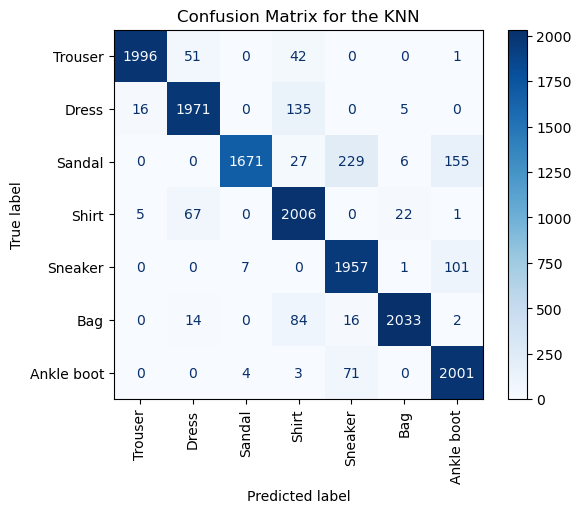

In [39]:
conf_matrix_test = confusion_matrix(y_test, y_pred= y_pred_knn)
ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels_names).plot(cmap='Blues')
plt.title("Confusion Matrix for the KNN")
plt.xticks(rotation=90)
plt.show()


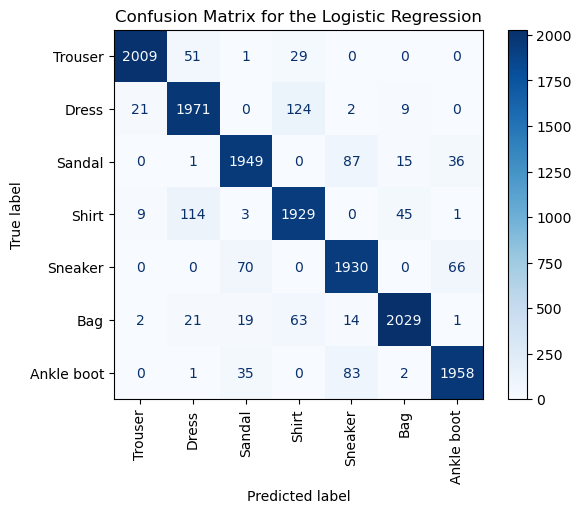

In [40]:
conf_matrix_test = confusion_matrix(y_test, y_pred= y_pred)
ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels_names).plot(cmap='Blues')
plt.title("Confusion Matrix for the Logistic Regression")
plt.xticks(rotation=90)
plt.show()

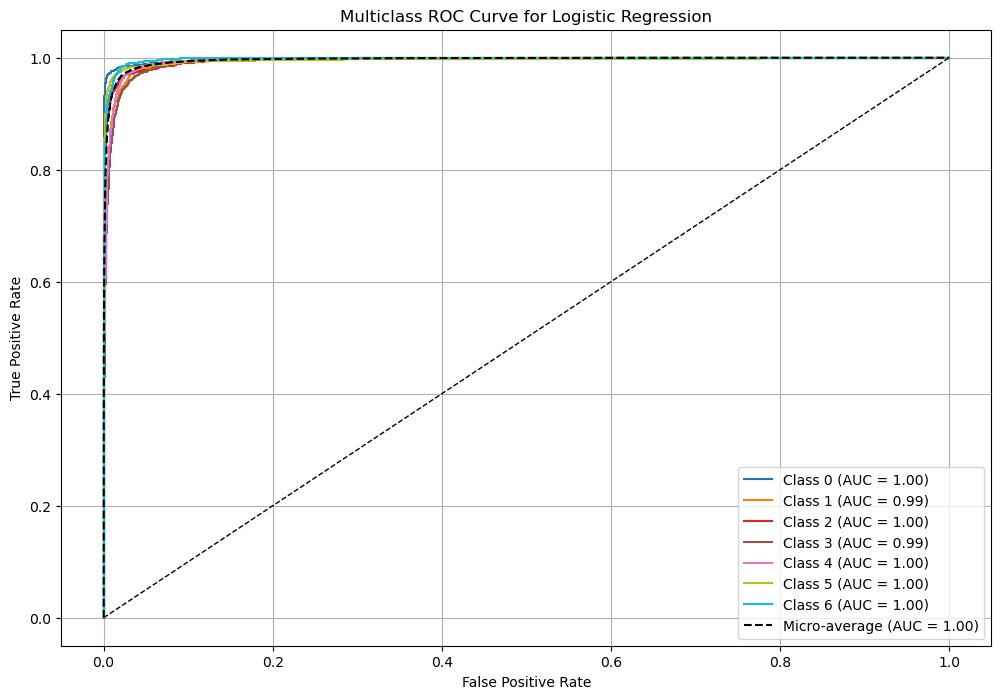

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels (e.g., one-hot encode)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Ensure correct unique classes
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_proba = logreg.predict_proba(X_test)

# Initialize variables to store ROC metrics
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_proba, average="micro")

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})", color=colors(i))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro:.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


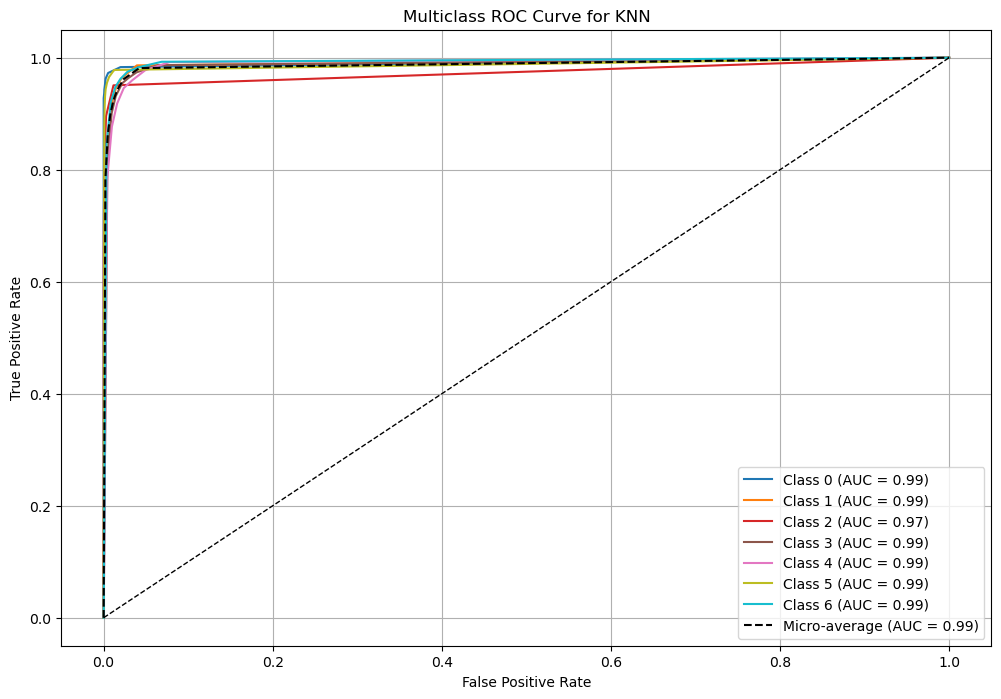

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels (e.g., one-hot encode)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Ensure correct unique classes
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_proba = knn.predict_proba(X_test)

# Initialize variables to store ROC metrics
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_proba, average="micro")

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})", color=colors(i))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro:.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve for KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Trying a CNN model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

<h2>Pre-Processing for the CNN model</h2>

In [18]:
# Reshape to (num_samples, 28, 28, 1)
X = X.values.reshape(-1, 28, 28, 1)  
X = X / 255.0


X_train_cnn1 , X_test_cnn , y_train_cnn1, y_test_cnn = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle=True)

X_train_cnn , X_valid_cnn , y_train_cnn, y_valid_cnn = train_test_split(X_train_cnn1, y_train_cnn1, test_size=0.1, random_state=42 , shuffle=True)

In [19]:
X_train_cnn.shape , X_test_cnn.shape , y_train_cnn.shape , y_test_cnn.shape , X_valid_cnn.shape , y_valid_cnn.shape

((30240, 28, 28, 1),
 (8400, 28, 28, 1),
 (30240,),
 (8400,),
 (3360, 28, 28, 1),
 (3360,))

<h2>Building the Model</h2>

In [27]:
model = Sequential([

    # 1st Conv layer

    Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    #2nd conv layer

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    #flatten layer

    Flatten(),

    # final layers
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax') 
])

In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [29]:
# Learning rate scheduler
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,690 (483.16 KB)

 Trainable params: 123,690 (483.16 KB)

 Non-trainable params: 0 (0.00 B)

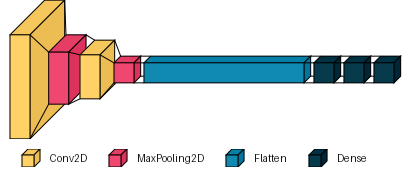

In [30]:
import visualkeras

visualkeras.layered_view(model, legend=True)

In [31]:
if tf.config.list_physical_devices('GPU'):
    print("Using GPU")
else:
    print("GPU not found. Using CPU.")

Using GPU


In [32]:
with tf.device('/device:GPU:0'):
    history = model.fit(
                    X_train_cnn, y_train_cnn, 
                    epochs=20, 
                    validation_data=(X_valid_cnn,y_valid_cnn), 
                    callbacks=[lr_scheduler , early_stopping],
                    batch_size=32)

Epoch 1/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3285 - loss: 1.6358 - val_accuracy: 0.8595 - val_loss: 0.3948 - learning_rate: 0.0010
Epoch 2/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8660 - loss: 0.3904 - val_accuracy: 0.8982 - val_loss: 0.2951 - learning_rate: 0.0010
Epoch 3/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8937 - loss: 0.3090 - val_accuracy: 0.9054 - val_loss: 0.2607 - learning_rate: 0.0010
Epoch 4/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9110 - loss: 0.2563 - val_accuracy: 0.9274 - val_loss: 0.2042 - learning_rate: 0.0010
Epoch 5/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9194 - loss: 0.2294 - val_accuracy: 0.9283 - val_loss: 0.1993 - learning_rate: 0.0010
Epoch 6/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9280 - loss: 0.2100 - val_accuracy: 0.9289 - val_loss: 0.1955 - learning_rate: 0.0010
Epoch 7/20
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9368 - loss: 0.1863 - 

# Loss curve

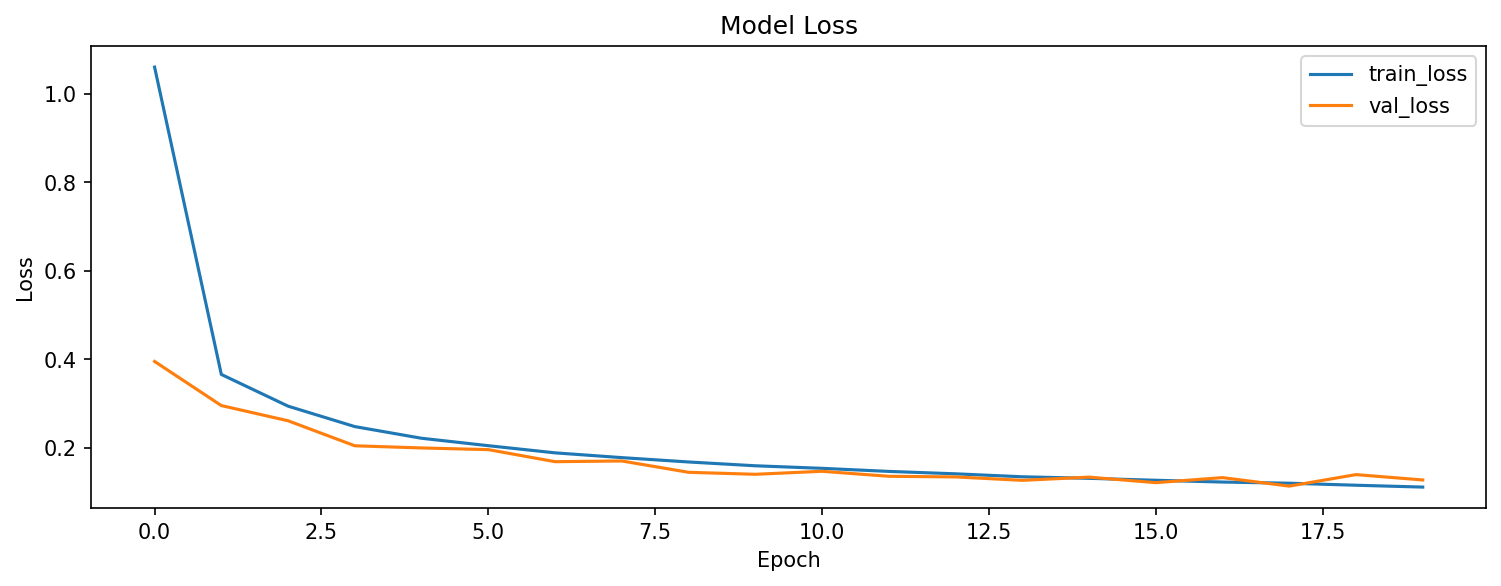

In [33]:
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

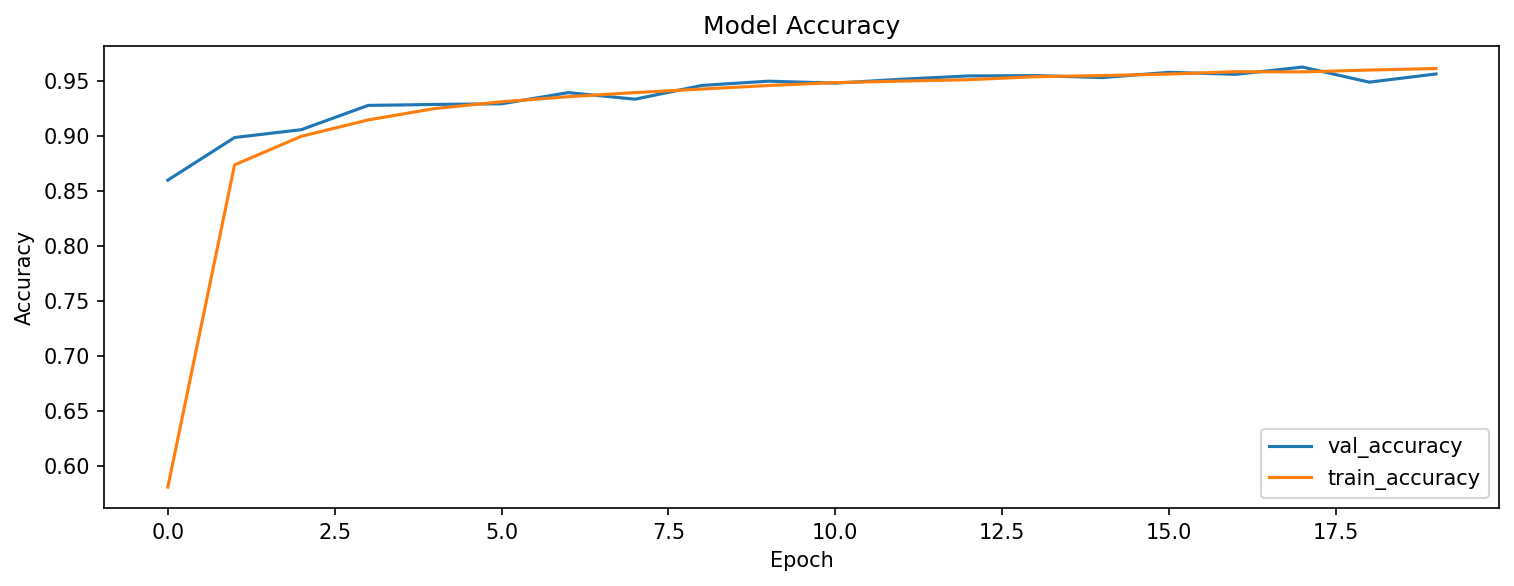

In [40]:
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [46]:
y_pred_cnn_prob = model.predict(X_test_cnn)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [51]:
def Predict_class(pred):
    class_index = np.argmax(pred)  # Index of highest probability class
    return labels.get(class_index, "Unknown") 

In [68]:

y_pred_class_labels = [Predict_class(pred) for pred in y_pred_cnn]

y_pred_class_labels[:5]

['Trouser', 'Sneaker', 'Ankle boot', 'Bag', 'Ankle boot']

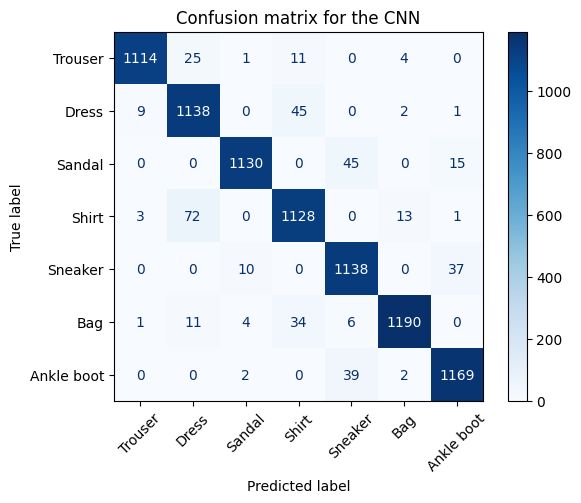

In [71]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , confusion_matrix
# Convert true labels (y_valid_cnn) to class names
y_true_class_labels = [labels[key] for key in y_test_cnn]

# Compute confusion matrix
cm = confusion_matrix(y_true_class_labels, y_pred_class_labels, labels=list(labels.values()))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(labels.values()))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title("Confusion matrix for the CNN")
plt.show()

In [70]:
print(classification_report(y_true_class_labels, y_pred_class_labels, target_names=list(labels.values())))


              precision    recall  f1-score   support

     Trouser       0.96      0.96      0.96      1212
       Dress       0.98      0.96      0.97      1246
      Sandal       0.91      0.95      0.93      1195
       Shirt       0.99      0.95      0.97      1190
     Sneaker       0.93      0.93      0.93      1217
         Bag       0.93      0.96      0.94      1185
  Ankle boot       0.99      0.96      0.98      1155

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400

